# Read a netCDF file with xarray library
---
**Documentation Author:** [Niccolò Tubini](https://www.researchgate.net/profile/Niccolo_Tubini2), [Riccardo Rigon](https://scholar.google.it/citations?user=OB1jx0IAAAAJ&hl=it)

**To whom address questions:** 
 - [Niccolò Tubini](https://www.researchgate.net/profile/Niccolo_Tubini2) 
 - [GEOframe Users Group](https://groups.google.com/forum/#!forum/geoframe-components-users)
 - [GEOframe Developers Mailing List](https://groups.google.com/forum/#!forum/geoframe-components-developers)
 
**Version:** 0.98

**Keywords:** OMS3, netCDF, xarray

**License:** [GPL3 v3](https://www.gnu.org/licenses/gpl-3.0.en.html)

## Table of Contents

* [NetCDF](#netcdf)

* [An example](#example)
    * [Read a netCDF file](#read)
    * [Dataset properties](#properties)
    * [Indexing](#indexing)
        * [numpy-like `[]`](#numpy_like)
        * [pandas-like `loc`](#pandas_like)
        * [`isel`](#isel)
        * [`sel`](#sel)
        * [More on indexing and selecting data](#more_indexing)
    * [Plotting](#plotting)
    * [Operation on data](#operation)
        * [Mean, max, min](#mean)
        * [Extract data](#extract)

# NetCDF - Network Common Data Format <a class="anchor" id="necdf"></a>
From: https://www.unidata.ucar.edu/software/netcdf/docs/netcdf_data_set_components.html

_A netCDF dataset contains **dimensions**, **variables**, and **attributes**, which all have both a name and an ID number by which they are identified. These components can be used together to capture the meaning of data and relations among data fields in an array-oriented dataset. The netCDF library allows simultaneous access to multiple netCDF datasets which are identified by dataset ID numbers, in addition to ordinary file names._

- **Dimensions**
_A dimension may be used to represent a real physical dimension, for example, time, latitude, longitude, or height. A dimension might also be used to index other quantities, for example station or model-run-number. A netCDF dimension has both a name and a length._

    In the following image there are two spatial dimensions (latitude and longitude) and time. In our case we have just one spatial dimension (depth) and time.

- **Variables**
_Variables are used to store the bulk of the data in a netCDF dataset. A variable represents an array of values of the same type. A scalar value is treated as a 0-dimensional array. A variable has a name, a data type, and a shape described by its list of dimensions specified when the variable is created. A variable may also have associated attributes, which may be added, deleted or changed after the variable is created.
A position along a dimension can be specified using an index. This is an integer with a minimum value of 0 for Python_

- **Attributes**
_NetCDF attributes are used to store data about the data (ancillary data or metadata), similar in many ways to the information stored in data dictionaries and schema in conventional database systems. Most attributes provide information about a specific variable. These are identified by the name (or ID) of that variable, together with the name of the attribute.
    Some attributes provide information about the dataset as a whole and are called global attributes. These are identified by the attribute name together with a blank variable name (in CDL) or a special null "global variable" ID (in C or Fortran)._
    
<figure>
    <img src="Figures/netcdf-file-structure.png" width="800" height="800/1.618">
    <figcaption>Fig.1 - Structure of a netCDF file  https://simulatingcomplexity.wordpress.com/tag/big-data/ </figcaption>
<figure>
    
    
    
A usefull library to read netCDF file is [xarray]('http://xarray.pydata.org/en/stable/'). [Here]('https://xarray-contrib.github.io/xarray-tutorial/') you can find some useful tutorials. 

# An example <a class="anchor" id="example"></a>

Here we show how to read a netCDF file (.nc) and to plot data.
The file we use is `\output\Sim_DunnianRunOff_0000.nc`.

## Read the .nc file <a class="anchor" id="read"></a>
`xarray.open_dataset()`

In [2]:
import os
import xarray as xr

oms_project_path = os.path.dirname(os.getcwd())
ds = xr.open_dataset(oms_project_path+"\output\ex00_0000.nc")

## Dataset properties <a class="anchor" id="properties"></a>

`xarray.Dataset.keys()` returns:
- the dimensions
- the coordinates
- the name of variables and their own coordinates
- attributes of the file, its metadata.

In [4]:
ds

<xarray.Dataset>
Dimensions:           (depth: 100, dualDepth: 100, time: 1441)
Coordinates:
  * depth             (depth) float64 -1.99 -1.97 -1.95 ... -0.05 -0.03 -0.01
  * dualDepth         (dualDepth) float64 -2.0 -1.98 -1.96 ... -0.06 -0.04 -0.02
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-02
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex00.
    Top_boundary_condition:             Top Dirichlet
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:\Users\Niccolo\OMS\OMS_Project_WHET...
    path_bottom_boundary_condition:     C:\Users\Niccolo\OMS\OMS_Project_WHET...
    path_grid:                          C:\Users\Niccolo\OMS\OMS_Project_WHET...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

## Indexing <a class="anchor" id="indexing"></a>
xarray supports four kinds of indexing:


### numpy-like `[]` <a class="anchor" id="numpy_like"></a>
the variable `psi` has two coordinates, specifically `time` and `depth`. The first index refers to the `time` coordinate, the second index to the `depth` coordinate. In the following we select the first time coordinate and all the depth coordinates.

In [6]:
ds.psi[0,0]

<xarray.DataArray 'psi' ()>
array(-0.023721)
Coordinates:
    depth    float64 -1.99
    time     datetime64[ns] 2020-01-01
Attributes:
    units:      m
    long_name:  Water suction.

In the following we select the first depth coordinate step and all the time coordinates.

In [129]:
ds.psi[:,0]

<xarray.DataArray 'psi' (time: 865)>
array([-2.0025  , -2.0025  , -2.0025  , ..., -1.807998, -1.807961, -1.807928])
Coordinates:
    depth    float64 -2.998
  * time     (time) datetime64[ns] 2017-01-01 2017-01-01T00:05:00 ... 2017-01-04
Attributes:
    units:      m
    long_name:  Water suction.

### pandas-like `loc` <a class="anchor" id="pandas_like"></a>

In [7]:
ds.psi.loc['2020-01-01 00:00',:]

<xarray.DataArray 'psi' (depth: 100)>
array([-0.023721, -0.035139, -0.051684, -0.070478, -0.090118, -0.110025,
       -0.130005, -0.150001, -0.17    , -0.19    , -0.21    , -0.23    ,
       -0.25    , -0.27    , -0.29    , -0.31    , -0.33    , -0.35    ,
       -0.37    , -0.39    , -0.41    , -0.43    , -0.45    , -0.47    ,
       -0.49    , -0.51    , -0.53    , -0.55    , -0.57    , -0.59    ,
       -0.61    , -0.63    , -0.65    , -0.67    , -0.69    , -0.71    ,
       -0.73    , -0.75    , -0.77    , -0.79    , -0.81    , -0.83    ,
       -0.85    , -0.87    , -0.89    , -0.91    , -0.93    , -0.95    ,
       -0.97    , -0.99    , -1.01    , -1.03    , -1.05    , -1.07    ,
       -1.09    , -1.11    , -1.13    , -1.15    , -1.17    , -1.19    ,
       -1.21    , -1.23    , -1.25    , -1.27    , -1.29    , -1.31    ,
       -1.33    , -1.35    , -1.37    , -1.39    , -1.41    , -1.43    ,
       -1.45    , -1.47    , -1.49    , -1.51    , -1.53    , -1.55    ,
       -1.57    , -1.59    , -1.61    , -1.63    , -1.65    , -1.67    ,
       -1.69    , -1.71    , -1.73    , -1.75    , -1.77    , -1.79    ,
       -1.81    , -1.83    , -1.85    , -1.87    , -1.89    , -1.91    ,
       -1.92999 , -1.948104, -1.620479, -0.358894])
Coordinates:
  * depth    (depth) float64 -1.99 -1.97 -1.95 -1.93 ... -0.07 -0.05 -0.03 -0.01
    time     datetime64[ns] 2020-01-01
Attributes:
    units:      m
    long_name:  Water suction.

### `isel` <a class="anchor" id="isel"></a>
by dimension name and integer label

In [8]:
ds.psi.isel(time=0)

<xarray.DataArray 'psi' (depth: 100)>
array([-0.023721, -0.035139, -0.051684, -0.070478, -0.090118, -0.110025,
       -0.130005, -0.150001, -0.17    , -0.19    , -0.21    , -0.23    ,
       -0.25    , -0.27    , -0.29    , -0.31    , -0.33    , -0.35    ,
       -0.37    , -0.39    , -0.41    , -0.43    , -0.45    , -0.47    ,
       -0.49    , -0.51    , -0.53    , -0.55    , -0.57    , -0.59    ,
       -0.61    , -0.63    , -0.65    , -0.67    , -0.69    , -0.71    ,
       -0.73    , -0.75    , -0.77    , -0.79    , -0.81    , -0.83    ,
       -0.85    , -0.87    , -0.89    , -0.91    , -0.93    , -0.95    ,
       -0.97    , -0.99    , -1.01    , -1.03    , -1.05    , -1.07    ,
       -1.09    , -1.11    , -1.13    , -1.15    , -1.17    , -1.19    ,
       -1.21    , -1.23    , -1.25    , -1.27    , -1.29    , -1.31    ,
       -1.33    , -1.35    , -1.37    , -1.39    , -1.41    , -1.43    ,
       -1.45    , -1.47    , -1.49    , -1.51    , -1.53    , -1.55    ,
       -1.57    , -1.59    , -1.61    , -1.63    , -1.65    , -1.67    ,
       -1.69    , -1.71    , -1.73    , -1.75    , -1.77    , -1.79    ,
       -1.81    , -1.83    , -1.85    , -1.87    , -1.89    , -1.91    ,
       -1.92999 , -1.948104, -1.620479, -0.358894])
Coordinates:
  * depth    (depth) float64 -1.99 -1.97 -1.95 -1.93 ... -0.07 -0.05 -0.03 -0.01
    time     datetime64[ns] 2020-01-01
Attributes:
    units:      m
    long_name:  Water suction.

### `sel` <a class="anchor" id="sel"></a>
by dimension name and coordinate label

In [10]:
ds.psi.sel(time='2020-01-01 00:00')

<xarray.DataArray 'psi' (depth: 100)>
array([-0.023721, -0.035139, -0.051684, -0.070478, -0.090118, -0.110025,
       -0.130005, -0.150001, -0.17    , -0.19    , -0.21    , -0.23    ,
       -0.25    , -0.27    , -0.29    , -0.31    , -0.33    , -0.35    ,
       -0.37    , -0.39    , -0.41    , -0.43    , -0.45    , -0.47    ,
       -0.49    , -0.51    , -0.53    , -0.55    , -0.57    , -0.59    ,
       -0.61    , -0.63    , -0.65    , -0.67    , -0.69    , -0.71    ,
       -0.73    , -0.75    , -0.77    , -0.79    , -0.81    , -0.83    ,
       -0.85    , -0.87    , -0.89    , -0.91    , -0.93    , -0.95    ,
       -0.97    , -0.99    , -1.01    , -1.03    , -1.05    , -1.07    ,
       -1.09    , -1.11    , -1.13    , -1.15    , -1.17    , -1.19    ,
       -1.21    , -1.23    , -1.25    , -1.27    , -1.29    , -1.31    ,
       -1.33    , -1.35    , -1.37    , -1.39    , -1.41    , -1.43    ,
       -1.45    , -1.47    , -1.49    , -1.51    , -1.53    , -1.55    ,
       -1.57    , -1.59    , -1.61    , -1.63    , -1.65    , -1.67    ,
       -1.69    , -1.71    , -1.73    , -1.75    , -1.77    , -1.79    ,
       -1.81    , -1.83    , -1.85    , -1.87    , -1.89    , -1.91    ,
       -1.92999 , -1.948104, -1.620479, -0.358894])
Coordinates:
  * depth    (depth) float64 -1.99 -1.97 -1.95 -1.93 ... -0.07 -0.05 -0.03 -0.01
    time     datetime64[ns] 2020-01-01
Attributes:
    units:      m
    long_name:  Water suction.

In [11]:
ds.psi.sel(depth=-0.5, method='nearest')

<xarray.DataArray 'psi' (time: 1441)>
array([-1.510000e+00, -1.510000e+00, -1.510000e+00, ..., -4.923281e-04,
        3.507091e-04,  4.946389e-03])
Coordinates:
    depth    float64 -0.49
  * time     (time) datetime64[ns] 2020-01-01 2020-01-01T00:01:00 ... 2020-01-02
Attributes:
    units:      m
    long_name:  Water suction.

### More on indexing and selecting data <a class="anchor" id="more_indexing"></a>

http://xarray.pydata.org/en/stable/indexing.html#indexing

## Plotting <a class="anchor" id="plotting"></a>

`psi` is a variable of the Dataset and it has two coordinates: `time` and `depth`.
To get more info about the `psi` variable we can run `ds.psi`.

In [133]:
ds.psi

<xarray.DataArray 'psi' (time: 865, depth: 601)>
[519865 values with dtype=float64]
Coordinates:
  * depth    (depth) float64 -2.998 -2.993 -2.988 -2.982 ... -0.0075 -0.0025 0.0
  * time     (time) datetime64[ns] 2017-01-01 2017-01-01T00:05:00 ... 2017-01-04
Attributes:
    units:      m
    long_name:  Water suction.

C:\Users\Niccolo\Anaconda3\envs\geoframe_verona\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
C:\Users\Niccolo\Anaconda3\envs\geoframe_verona\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)


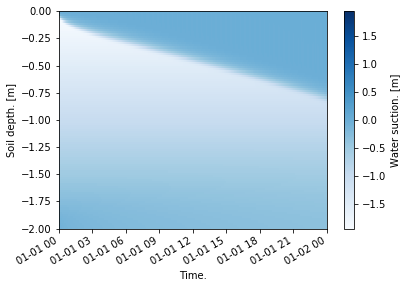

In [12]:
ds.psi.plot(y='depth', cmap='Blues')

To plot the vertical profile at a specific date

`ds.variable.sel(time='yyyy-mm-dd hh:mm').plot()`

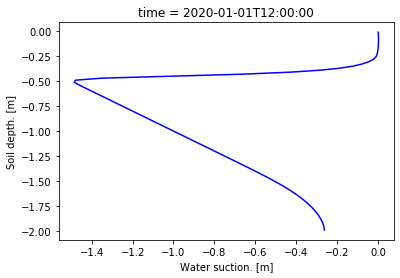

In [13]:
ds.psi.sel(time='2020-01-01 12:00').plot(y='depth', color='blue')

To plot the timeseries at a specific depth

`ds.variable.sel(depth=value, method='nearest').plot()`

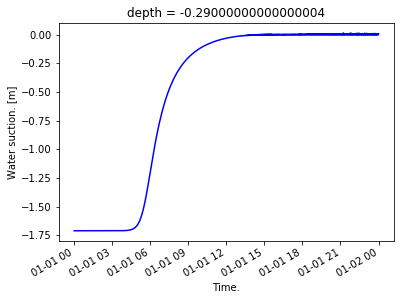

In [14]:
ds.psi.sel(depth=-0.3, method='nearest').plot( color='blue')

It is also possible to slice on both the coordinates

`ds.variable.sel(depth=value, method='nearest').sel(time=slice('yyyy-mm-dd hh:mm','yyyy-mm-dd hh:mm')).plot()`

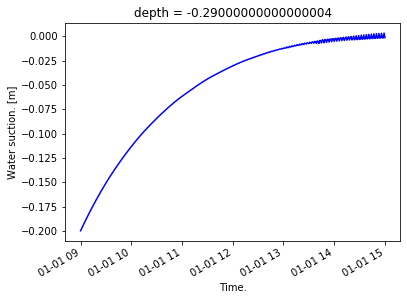

In [15]:
ds.psi.sel(depth=-0.3, method='nearest').sel(time=slice('2020-01-01 09:00','2020-01-01 15:00')).plot( color='blue')

## Operation on data <a class="anchor" id="operation"></a>

Convert `psi` from [m] to [cm] and store the result in a new varibale of the dataset `psi_cm`

In [16]:
ds['psi_cm']=ds.psi*100

In [17]:
ds.psi_cm

<xarray.DataArray 'psi_cm' (time: 1441, depth: 100)>
array([[-2.37214394e+00, -3.51389146e+00, -5.16837094e+00, ...,
        -1.94810441e+02, -1.62047943e+02, -3.58894325e+01],
       [-3.15242737e+00, -4.00584205e+00, -5.40842404e+00, ...,
        -1.93541291e+02, -1.04407839e+02, -1.63649599e+01],
       [-3.71725682e+00, -4.43044430e+00, -5.66449912e+00, ...,
        -1.87359362e+02, -7.00253754e+01, -1.02573956e+01],
       ...,
       [-3.27985602e+01, -3.28907173e+01, -3.30666736e+01, ...,
         6.65190324e-03,  4.83912963e-03,  2.95437192e-03],
       [-3.28058512e+01, -3.28979905e+01, -3.30739136e+01, ...,
         4.01608822e-03,  3.21023319e-03,  2.40350903e-03],
       [-3.28131386e+01, -3.29052601e+01, -3.30811501e+01, ...,
         2.34292448e-01,  1.41326341e-01,  4.84339270e-02]])
Coordinates:
  * depth    (depth) float64 -1.99 -1.97 -1.95 -1.93 ... -0.07 -0.05 -0.03 -0.01
  * time     (time) datetime64[ns] 2020-01-01 2020-01-01T00:01:00 ... 2020-01-02

Specify `units` and `long_name` for the variable `psi_cm`

In [18]:
ds.psi_cm.attrs["units"] = "cm"
ds.psi_cm.attrs['long_name'] = 'Water suction'

ds.psi_cm

<xarray.DataArray 'psi_cm' (time: 1441, depth: 100)>
array([[-2.37214394e+00, -3.51389146e+00, -5.16837094e+00, ...,
        -1.94810441e+02, -1.62047943e+02, -3.58894325e+01],
       [-3.15242737e+00, -4.00584205e+00, -5.40842404e+00, ...,
        -1.93541291e+02, -1.04407839e+02, -1.63649599e+01],
       [-3.71725682e+00, -4.43044430e+00, -5.66449912e+00, ...,
        -1.87359362e+02, -7.00253754e+01, -1.02573956e+01],
       ...,
       [-3.27985602e+01, -3.28907173e+01, -3.30666736e+01, ...,
         6.65190324e-03,  4.83912963e-03,  2.95437192e-03],
       [-3.28058512e+01, -3.28979905e+01, -3.30739136e+01, ...,
         4.01608822e-03,  3.21023319e-03,  2.40350903e-03],
       [-3.28131386e+01, -3.29052601e+01, -3.30811501e+01, ...,
         2.34292448e-01,  1.41326341e-01,  4.84339270e-02]])
Coordinates:
  * depth    (depth) float64 -1.99 -1.97 -1.95 -1.93 ... -0.07 -0.05 -0.03 -0.01
  * time     (time) datetime64[ns] 2020-01-01 2020-01-01T00:01:00 ... 2020-01-02
Attributes:
    units:      cm
    long_name:  Water suction

### Mean, max, min <a class="anchor" id="mean"></a>

In [19]:
ds.psi.max()

<xarray.DataArray 'psi' ()>
array(0.01795347)

In [20]:
ds.psi.min()

<xarray.DataArray 'psi' ()>
array(-1.94810441)

In [143]:
ds.psi.mean('depth')

<xarray.DataArray 'psi' (time: 865)>
array([-3.502496, -3.502496, -3.502496, ..., -0.061863, -0.061913, -0.061963])
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01 2017-01-01T00:05:00 ... 2017-01-04

### Extract data <a class="anchor" id="extract"></a>

In [144]:
psi = ds.psi.sel(time='2017-01-01 00:00').values
print(type(psi))
print(psi)

<class 'numpy.ndarray'>
[-2.0025     -2.0075     -2.0125     -2.0175     -2.0225     -2.0275
 -2.0325     -2.0375     -2.0425     -2.0475     -2.0525     -2.0575
 -2.0625     -2.0675     -2.0725     -2.0775     -2.0825     -2.0875
 -2.0925     -2.0975     -2.1025     -2.1075     -2.1125     -2.1175
 -2.1225     -2.1275     -2.1325     -2.1375     -2.1425     -2.1475
 -2.1525     -2.1575     -2.1625     -2.1675     -2.1725     -2.1775
 -2.1825     -2.1875     -2.1925     -2.1975     -2.2025     -2.2075
 -2.2125     -2.2175     -2.2225     -2.2275     -2.2325     -2.2375
 -2.2425     -2.2475     -2.2525     -2.2575     -2.2625     -2.2675
 -2.2725     -2.2775     -2.2825     -2.2875     -2.2925     -2.2975
 -2.3025     -2.3075     -2.3125     -2.3175     -2.3225     -2.3275
 -2.3325     -2.3375     -2.3425     -2.3475     -2.3525     -2.3575
 -2.3625     -2.3675     -2.3725     -2.3775     -2.3825     -2.3875
 -2.3925     -2.3975     -2.4025     -2.4075     -2.4125     -2.4175
 -2.4225  